In [ ]:
import numpy as np
import pymc3 as pm
import scipy.stats as stats
import matplotlib.pyplot as plt
D=np.array([0.15,0.21,0.22,0.18,0.27,0.29,0.26,0.12,0.25,0.24])

print(np.mean(D),np.mean((D-np.mean(D))**2))
print(np.mean(D),np.sqrt(np.mean((D-np.mean(D))**2)))

0.21900000000000003 0.0026889999999999996
0.21900000000000003 0.05185556864985669


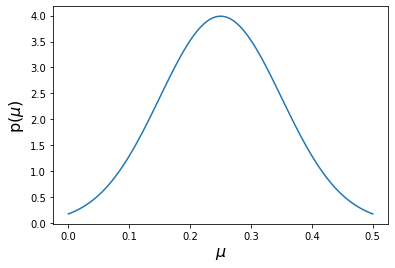

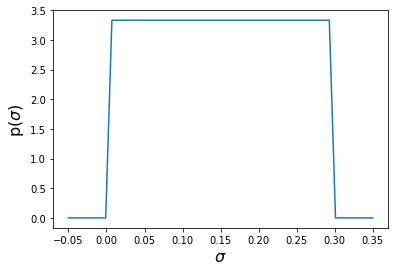

In [ ]:
x=np.linspace(0.0,0.5,100)
plt.plot(x,np.exp(pm.Normal.dist(0.25,0.1).logp(x).eval()))
plt.ylabel("p($\mu$)",fontsize=16)
plt.xlabel("$\mu$",fontsize=16);
plt.savefig("prior_mu.pdf")
plt.figure()
x=np.linspace(-0.05,0.35)
plt.plot(x,np.exp(pm.Uniform.dist(0.0001,0.3).logp(x).eval()))
plt.ylabel("p($\sigma$)",fontsize=16)
plt.xlabel("$\sigma$",fontsize=16);
plt.savefig("prior_sigma.pdf")

In [ ]:
D=np.array([0.24,0.24,0.24])
mymodel=pm.Model()
with mymodel:
    mu = pm.Normal('mu',0.25,0.1)
    sigma = pm.Uniform('sigma',0.0001,0.2)
    pm.Normal('Like',mu,sigma,observed=D)

with mymodel:
    estimate=pm.find_MAP()
print(estimate['mu'],estimate['sigma'])

logp = 27.863, ||grad|| = 0.19808: 100%|██████████| 62/62 [00:00<00:00, 2992.14it/s]          

0.24000000399360533 0.00010000000410749458


In [ ]:
D=np.array([0.212 , 0.188 , 0.367 , 0.1886, 0.1595, 0.1766, 0.1787, 0.1786,
       0.231 , 0.2335, 0.2599, 0.2136, 0.2114, 0.1825, 0.3127, 0.1861,
       0.2161, 0.2534, 0.2699, 0.1528]) 
print(np.mean(D),np.mean((D-np.mean(D))**2))
print(np.mean(D),np.sqrt(np.mean((D-np.mean(D))**2)))

0.218595 0.0026951244749999995
0.218595 0.051914588267653626


In [ ]:
mymodel=pm.Model()
with mymodel:
    mu = pm.Normal('mu',0.25,0.1)
    sigma = pm.Uniform('sigma',0.0001,0.2)
    pm.Normal('Like',mu,sigma,observed=D)

with mymodel:
    estimate=pm.find_MAP()
print(estimate['mu'],estimate['sigma'])

logp = 33.713, ||grad|| = 15.64: 100%|██████████| 16/16 [00:00<00:00, 4137.41it/s]  

0.21901258483163405 0.05191627823315031


In [ ]:
D=np.array([0.15,0.21,0.22,0.18,0.27,0.29,0.26,0.12,0.25,0.24])
mymodel=pm.Model()
with mymodel:
    mu = pm.Normal('mu',0.25,0.1)
    sigma = pm.Uniform('sigma',0.0001,0.2)
    pm.Normal('Like',mu,sigma,observed=D)

with mymodel:
    samples=pm.sample(30000,tune=3000,chains=1)


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling chain 0, 0 divergences: 100%|██████████| 33000/33000 [00:14<00:00, 2235.94it/s]
Only one chain was sampled, this makes it impossible to run some convergence checks


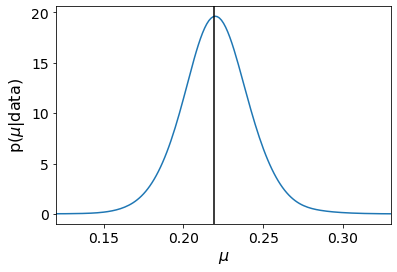

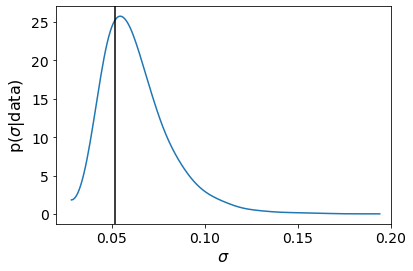

In [ ]:
az.plot_dist(samples['mu'])
plt.ylabel("p($\mu$|data)",fontsize=16)
plt.xlabel("$\mu$",fontsize=16);
plt.axvline(0.219,color='black')
plt.xlim([0.12,0.33])
plt.savefig("posterior_mu.pdf")
plt.figure()
az.plot_dist(samples['sigma'])
plt.ylabel("p($\sigma$|data)",fontsize=16)
plt.xlabel("$\sigma$",fontsize=16);
plt.axvline(0.051916,color='black')
plt.xlim([0.02,0.2])
plt.savefig("posterior_sigma.pdf")

In [ ]:
D=np.array([0.212 , 0.188 , 0.367 , 0.1886, 0.1595, 0.1766, 0.1787, 0.1786,
       0.231 , 0.2335, 0.2599, 0.2136, 0.2114, 0.1825, 0.3127, 0.1861,
       0.2161, 0.2534, 0.2699, 0.1528]) 
mymodel=pm.Model()
with mymodel:
    mu = pm.Normal('mu',0.25,0.1)
    sigma = pm.Uniform('sigma',0.0001,0.2)
    pm.Normal('Like',mu,sigma,observed=D)

with mymodel:
    samples=pm.sample(10000,tune=3000,chains=1)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling chain 0, 0 divergences: 100%|██████████| 13000/13000 [00:05<00:00, 2184.24it/s]
Only one chain was sampled, this makes it impossible to run some convergence checks


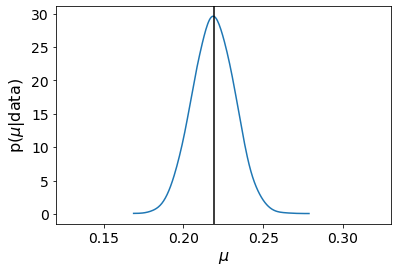

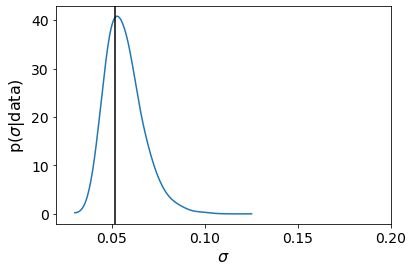

In [ ]:
az.plot_dist(samples['mu'])
plt.ylabel("p($\mu$|data)",fontsize=16)
plt.xlabel("$\mu$",fontsize=16);
plt.axvline(0.219,color='black')
plt.xlim([0.12,0.33])
plt.savefig("posterior_mu2.pdf")
plt.figure()
az.plot_dist(samples['sigma'])
plt.xlim([0.02,0.2])
plt.ylabel("p($\sigma$|data)",fontsize=16)
plt.xlabel("$\sigma$",fontsize=16);
plt.axvline(0.051916,color='black')
plt.savefig("posterior_sigma2.pdf")

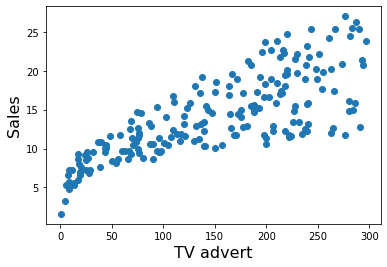

In [ ]:

import pandas as pd
#Importing the dataset
data = pd.read_csv("dataset/Advertising.csv")
data.head()
x=data['TV'].values
y=data['Sales'].values
plt.scatter(x,y)
plt.xlabel("TV advert", fontsize=16)
plt.ylabel("Sales", fontsize=16)
plt.savefig("TVSales.pdf")

beta= 0.04753664043301975 alpha= 7.032593549127695
prediction at x=105: [12.02394079]
prediction at x=200: [16.53992164]


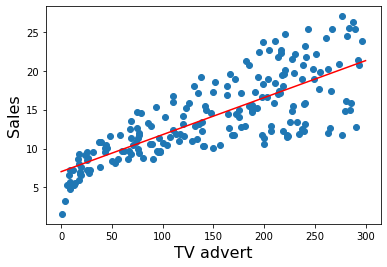

In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(x.reshape(-1,1), y)
print("beta=",reg.coef_[0],"alpha=",reg.intercept_)
print("prediction at x=105:", reg.predict(np.array([[105]])))
print("prediction at x=200:", reg.predict(np.array([[200]])))
xx=np.linspace(0,300)
plt.plot(xx,xx*reg.coef_[0]+reg.intercept_,c='r')#regression line
plt.scatter(x,y)
plt.xlabel("TV advert", fontsize=16)
plt.ylabel("Sales", fontsize=16)
plt.savefig("regreTVSALES.pdf")

In [ ]:
regmodel=pm.Model()
with regmodel:
    alpha = pm.Normal('alpha',0.0,30)
    beta  = pm.Normal('beta',0.0,30)
    sigma = pm.Uniform('sigma',0.0001,20)
    z = beta*x+alpha
    pm.Normal('Like',z,sigma,observed=y)

with regmodel:
    samples=pm.sample(10000,tune=3000,chains=1)


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, beta, alpha]
Sampling chain 0, 0 divergences: 100%|██████████| 13000/13000 [00:11<00:00, 1175.84it/s]
Only one chain was sampled, this makes it impossible to run some convergence checks


In [ ]:
print(samples[0])
print(samples[1])
print(samples[5000])

{'alpha': 7.428251066445828, 'beta': 0.04405108836382775, 'sigma_interval__': -1.7348719782966473, 'sigma': 2.99939421554398}
{'alpha': 7.917804464814263, 'beta': 0.04369666293873943, 'sigma_interval__': -1.7269327975797477, 'sigma': 3.01969148521997}
{'alpha': 6.5907659673701025, 'beta': 0.04837929677438062, 'sigma_interval__': -1.5905215480587247, 'sigma': 3.386293697530801}


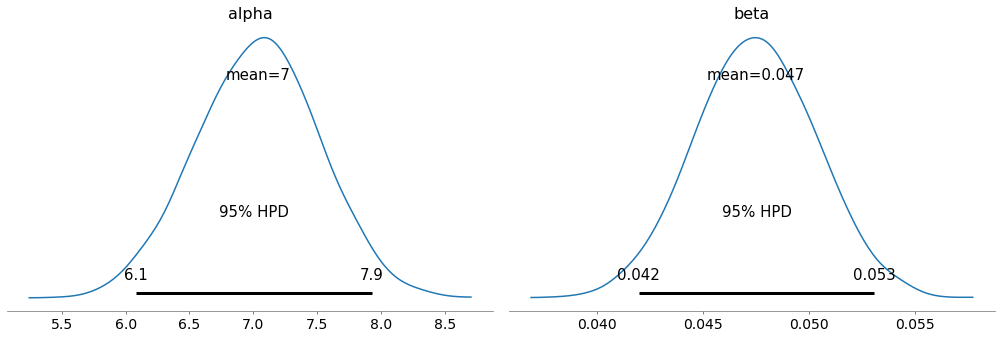

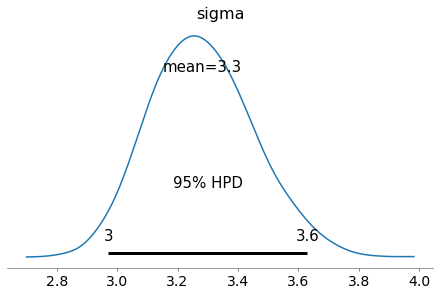

In [ ]:
az.plot_posterior(samples, var_names=['alpha','beta'], credible_interval=0.95)
plt.savefig("posterior_alpha_beta.pdf")
az.plot_posterior(samples, var_names='sigma', credible_interval=0.95)
plt.savefig("posterior_sigma.pdf")

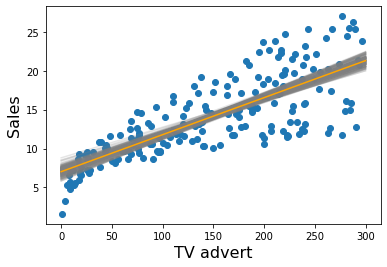

In [ ]:
xx=np.linspace(0,300)
for i in range(200):
    plt.plot(xx,xx*samples['beta'][i]+samples['alpha'][i],c='gray',alpha=0.2)#regression line
plt.plot(xx,xx*samples['beta'].mean()+samples['alpha'].mean(),c='orange')
plt.scatter(x,y)
plt.xlabel("TV advert", fontsize=16)
plt.ylabel("Sales", fontsize=16)
plt.savefig("TVSales_bayes_lines.pdf")

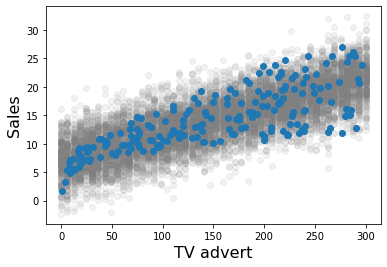

In [ ]:
xx=np.linspace(0,300)
for i in range(200):
    plt.scatter(xx,pm.Normal.dist(xx*samples['beta'][i]+samples['alpha'][i],samples['sigma'][i]).random(1),c='gray',alpha=0.1)#regression line
plt.scatter(x,y,Zorder=1000)
plt.xlabel("TV advert", fontsize=16)
plt.ylabel("Sales", fontsize=16)
plt.savefig("yobser_Tvsales.pdf")

0.093


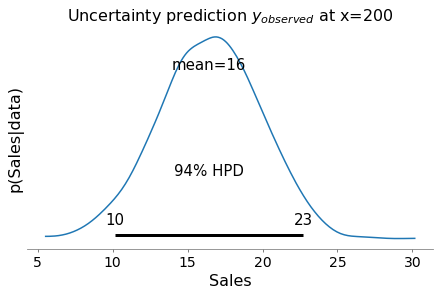

In [ ]:
import arviz as az
acc=[]
for i in range(2000):
    acc.append(pm.Normal.dist(200.0*samples['beta'][i]+samples['alpha'][i],samples['sigma'][i]).random(1))
acc=np.array(acc)
print(np.sum((acc<12))/len(acc))
az.plot_posterior(np.array(acc))

plt.xlabel("Sales", fontsize=16)
plt.ylabel("p(Sales|data)", fontsize=16)
plt.title("Uncertainty prediction $y_{observed}$ at x=200", fontsize=16)
plt.savefig("prediction_200_tvsales_yo.pdf")

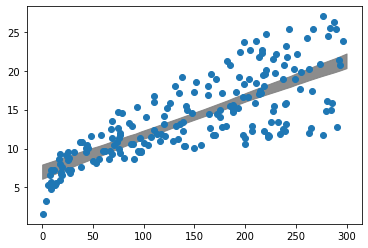

In [ ]:
sig0 = pm.hpd(np.array([xx*samples['beta'][i]+samples['alpha'][i] for i in range(len(samples['alpha']))]), credible_interval=0.95)
#sig1 = pm.hpd(ppc['y_obs'], alpha=0.05)
plt.scatter(x,y,Zorder=1000)
plt.fill_between(xx, sig0[:,0], sig0[:,1], color='gray', alpha=0.9)

#plt.fill_between(x_ord, sig1[:,0], sig1[:,1], color='gray', alpha=0.5)


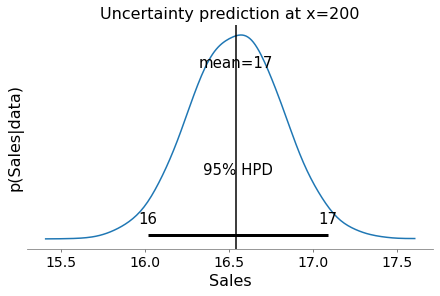

In [ ]:
import arviz as az
az.plot_posterior(200*samples['beta']+samples['alpha'],credible_interval=0.95)
plt.axvline(reg.predict(np.array([[200]])),color='black')
plt.xlabel("Sales", fontsize=16)
plt.ylabel("p(Sales|data)", fontsize=16)
plt.title("Uncertainty prediction at x=200", fontsize=16)
plt.savefig("prediction_200_tvsales.pdf")


Text(0.5, 1.0, 'Uncertainty prediction at x=200')

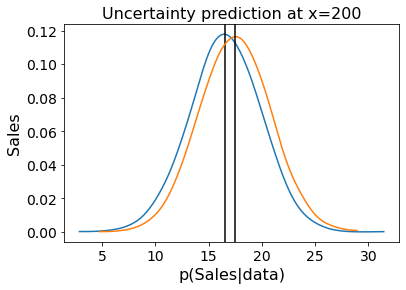

In [ ]:
az.plot_dist(pm.Normal.dist(200*samples['beta']+samples['alpha'],samples['sigma']).random(1))
plt.axvline(reg.predict(np.array([[200]])),color='black')
plt.ylabel("Sales", fontsize=16)
plt.xlabel("p(Sales|data)", fontsize=16)
plt.title("Uncertainty prediction at x=200", fontsize=16)
#plt.figure()
az.plot_dist(pm.Normal.dist(220*samples['beta']+samples['alpha'],samples['sigma']).random(1))
plt.axvline(reg.predict(np.array([[220]])),color='black')
plt.ylabel("Sales", fontsize=16)
plt.xlabel("p(Sales|data)", fontsize=16)
plt.title("Uncertainty prediction at x=200", fontsize=16)

In [ ]:
regmodel=pm.Model()
import theano.tensor as tt
with regmodel:
    alpha = pm.Normal('alpha',0.0,30)
    beta  = pm.Normal('beta',0.0,30)
    sigma1 = pm.Uniform('sigma1',0.0001,20)
    sigma2 = pm.Uniform('sigma2',0.0001,20)
    z = beta*x+alpha
    sigma=sigma1+x*sigma2#)
    pm.Normal('Like',z,sigma,observed=y)

with regmodel:
    samples=pm.sample(10000,tune=3000,chains=1)


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma2, sigma1, beta, alpha]
Sampling chain 0, 0 divergences: 100%|██████████| 13000/13000 [00:12<00:00, 1068.13it/s]
Only one chain was sampled, this makes it impossible to run some convergence checks


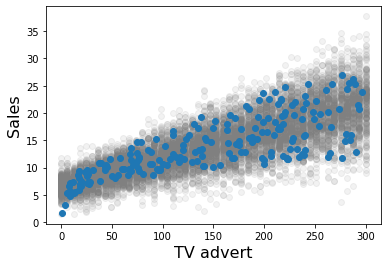

In [ ]:
xx=np.linspace(0,300)
for i in range(200):
    plt.scatter(xx,pm.Normal.dist(xx*samples['beta'][i]+samples['alpha'][i],samples['sigma1'][i]+samples['sigma2'][i]*xx).random(1),c='gray',alpha=0.1)#regression line
plt.scatter(x,y,Zorder=1000)
plt.xlabel("TV advert", fontsize=16)
plt.ylabel("Sales", fontsize=16)
plt.savefig("yobser_Tvsales.pdf")

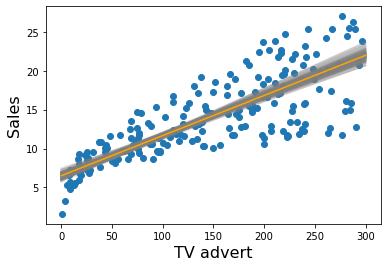

In [ ]:
xx=np.linspace(0,300)
for i in range(200):
    plt.plot(xx,xx*samples['beta'][i]+samples['alpha'][i],c='gray',alpha=0.2)#regression line
plt.plot(xx,xx*samples['beta'].mean()+samples['alpha'].mean(),c='orange')
plt.scatter(x,y)
plt.xlabel("TV advert", fontsize=16)
plt.ylabel("Sales", fontsize=16)
plt.savefig("TVSales_bayes_lines1.pdf")

In [4]:
# Chatper 2; 

from sklearn.feature_extraction.text import CountVectorizer
corpus = ['red','brown','brown','white']
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(corpus)

print (vectorizer.get_feature_names())
print (X. toarray () )

y = 

['brown', 'red', 'white']
[[0 1 0]
 [1 0 0]
 [1 0 0]
 [0 0 1]]


In [9]:
# https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html
import pymc3 as pm
from sklearn.naive_bayes import MultinomialNB

clf = MultinomialNB
clf.fit(X,y)

TypeError: ignored